步骤1.1 导入数据

In [3]:
import pandas as pd

# --- 参数配置 ---
# 使用相对路径，这样无论项目文件夹在哪里，代码都能正常工作
# '..' 表示从当前文件(preprocessing.ipynb)所在的scripts/目录，返回到上一级项目根目录
# 然后再进入 'data/' 目录找到文件
file_path = '../data/20250725_204056_20250718_JDL_report_Report..xlsx'

# 再次确认工作表的准确名称，这里假设之前的名称是正确的
sheet_to_read = '20250725_204056_20250718_JDL_re' 

print(f"正在尝试从相对路径读取文件: {file_path}")

# --- 数据读取与错误处理 ---
try:
    df = pd.read_excel(file_path, sheet_name=sheet_to_read)

    # 使用 f-string 格式化打印成功信息
    print(f"✅ 成功从文件的工作表 '{sheet_to_read}' 中导入数据！")
    print(f"数据维度（行, 列）: {df.shape}")
    
    # 在 Jupyter Notebook 中，使用 display() 可以获得更漂亮的表格输出
    display(df.head())

except FileNotFoundError:
    print(f"❌ 错误：文件未找到！")
    print(f"请再次检查相对路径是否正确: '{file_path}'")

except ValueError as e:
    print(f"❌ 错误：工作表名 '{sheet_to_read}' 不存在！")
    print("提示：请用 Excel 打开文件，确认工作表的准确名称。")

except Exception as e:
    print(f"❌ 发生了一个未知错误: {e}")

正在尝试从相对路径读取文件: ../data/20250725_204056_20250718_JDL_report_Report..xlsx
✅ 成功从文件的工作表 '20250725_204056_20250718_JDL_re' 中导入数据！
数据维度（行, 列）: (111770, 59)


,E.LFQMethod,R.FileName,R.Fraction,R.Condition,R.Replicate,R.Label,PG.GroupLabel,PG.ProteinAccessions,PG.ProteinGroups,PG.Cscore,...,EG.UsedForPeptideQuantity,EG.UsedForProteinGroupQuantity,EG.Cscore,EG.NormalizedCscore,FG.Charge,FG.IntMID,FG.LabeledSequence,FG.PrecMz,FG.PrecMzCalibrated,FG.Quantity
0,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A0A140LI88,A0A140LI88,A0A140LI88,26.834951,...,True,True,15.915181,15.899608,2,_NSEDEEQYIGK_,_NSEDEEQYIGK_,656.288574,656.288486,326.186554
1,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,27.509775,27.498368,2,_PAELIAKYVDSK_,_PAELIAKYVDSK_,667.371765,667.371651,797.563416
2,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,44.077770,44.072317,2,_LITYLDQTTQK_,_LITYLDQTTQK_,662.361389,662.361420,440.635742
3,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,34.701088,34.692265,2,_GLNSLLDENR_,_GLNSLLDENR_,565.793640,565.794214,270.908386
4,MaxLFQ,JDL_1_Slot2-10_1_20405,NaN,Not Defined,1,JDL_1_Slot2-10_1_20405.d,A2A432,A2A432,A2A432,52.557938,...,True,True,45.404552,45.399576,2,_ETVEEQASTTER_,_ETVEEQASTTER_,690.317871,690.317367,316.155487


步骤1.2 数据清洗与过滤

步骤1.2.1 移除伪数据库匹配

In [4]:
# 假设您已成功导入数据，并存放在名为 df 的 DataFrame 中

print("--- 开始数据清洗步骤 1.2.1: 移除伪数据库匹配 (Decoys) ---")

# 1. 查看过滤前的数据维度
print(f"原始数据维度 (行, 列): {df.shape}")

# 2. 查看 EG.IsDecoy 列的分布情况
# 这会告诉我们有多少是真实的(False)，有多少是诱饵(True)
print("\n过滤前 'EG.IsDecoy' 列的值分布：")
print(df['EG.IsDecoy'].value_counts())

# 3. 执行过滤操作
# 创建一个新的 DataFrame，只包含 'EG.IsDecoy' 为 False 的行。
# 加上 .copy() 是一个好习惯，可以避免后续操作出现警告，确保 df_no_decoys 是一个独立的副本。
df_no_decoys = df[df['EG.IsDecoy'] == False].copy()

# 4. 验证过滤结果
print("\n--- 过滤完成 ---")
print(f"移除 Decoy 后的数据维度 (行, 列): {df_no_decoys.shape}")

# 5. 再次检查 'EG.IsDecoy' 列，确认所有的 True 都已被移除
print("\n过滤后 'EG.IsDecoy' 列的值分布：")
# 如果操作成功，这里应该只会显示 False
print(df_no_decoys['EG.IsDecoy'].value_counts())

print("\n✅ Decoy 匹配已成功移除！")

--- 开始数据清洗步骤 1.2.1: 移除伪数据库匹配 (Decoys) ---
原始数据维度 (行, 列): (111770, 59)

过滤前 'EG.IsDecoy' 列的值分布：
EG.IsDecoy
False    111770
Name: count, dtype: int64

--- 过滤完成 ---
移除 Decoy 后的数据维度 (行, 列): (111770, 59)

过滤后 'EG.IsDecoy' 列的值分布：
EG.IsDecoy
False    111770
Name: count, dtype: int64

✅ Decoy 匹配已成功移除！


步骤1.2.2 移除已知污染物

In [5]:
# 假设 df_no_decoys 是上一步移除 Decoy 后得到的 DataFrame

print("\n--- 开始数据清洗步骤 1.2.2: 移除污染物 (Contaminants) ---")

# 1. 查看过滤前的数据维度
print(f"过滤前维度 (行, 列): {df_no_decoys.shape}")

# 2. 统计有多少行是污染物
# .str.startswith('CON__') 会返回一个布尔序列
# .sum() 会将 True (计为1) 和 False (计为0) 相加，从而得到污染物的总行数
contaminant_rows = df_no_decoys['PG.ProteinAccessions'].str.startswith('CON__', na=False).sum()
print(f"检测到 {contaminant_rows} 行数据属于污染物条目。")

# 3. 执行过滤操作
# 我们要保留所有 *不* 以 'CON__' 开头的行。
# 波浪号 '~' 在 Pandas 中代表 '取反' (NOT) 的操作。
# 同样，使用 .copy() 是一个好习惯。
df_no_contaminants = df_no_decoys[~df_no_decoys['PG.ProteinAccessions'].str.startswith('CON__', na=False)].copy()

# 4. 验证过滤结果
print("\n--- 过滤完成 ---")
print(f"移除污染物后的数据维度 (行, 列): {df_no_contaminants.shape}")

# 5. 再次检查，确认污染物已被移除
remaining_contaminants = df_no_contaminants['PG.ProteinAccessions'].str.startswith('CON__', na=False).sum()
print(f"过滤后剩余的污染物行数: {remaining_contaminants}") # 这个数字应该是 0

print("\n✅ 污染物条目已成功移除！")


--- 开始数据清洗步骤 1.2.2: 移除污染物 (Contaminants) ---
过滤前维度 (行, 列): (111770, 59)
检测到 0 行数据属于污染物条目。

--- 过滤完成 ---
移除污染物后的数据维度 (行, 列): (111770, 59)
过滤后剩余的污染物行数: 0

✅ 污染物条目已成功移除！


步骤1.2.3 基于Q-value值进行过滤

In [6]:
# 假设 df_no_contaminants 是上一步移除污染物后得到的 DataFrame

print("\n--- 开始数据清洗步骤 1.2.3: 基于 PG.Qvalue < 0.01 进行过滤 ---")

# 1. 查看过滤前的数据维度
print(f"过滤前维度 (行, 列): {df_no_contaminants.shape}")

# 2. 查看 PG.Qvalue 的分布情况（可选，但有助于理解数据）
# .describe() 可以给出该列的统计摘要，如均值、最大值、最小值、四分位数等
print("\n过滤前 'PG.Qvalue' 列的统计摘要：")
display(df_no_contaminants['PG.Qvalue'].describe())

# 3. 执行过滤操作
# 定义我们的阈值
QVALUE_THRESHOLD = 0.01

# 创建一个新的 DataFrame，只包含 'PG.Qvalue' 小于阈值的行。
# 同样，使用 .copy() 是一个好习惯。
df_filtered = df_no_contaminants[df_no_contaminants['PG.Qvalue'] < QVALUE_THRESHOLD].copy()

# 4. 验证过滤结果
print("\n--- 过滤完成 ---")
print(f"按 PG.Qvalue < {QVALUE_THRESHOLD} 过滤后的数据维度 (行, 列): {df_filtered.shape}")

# 5. 再次检查，确认所有保留的行的 PG.Qvalue 都符合标准
# 我们可以通过查看过滤后 PG.Qvalue 的最大值来验证
max_qvalue_after_filter = df_filtered['PG.Qvalue'].max()
print(f"过滤后 'PG.Qvalue' 的最大值: {max_qvalue_after_filter}") # 这个值应该小于 0.01

print("\n✅ 已成功按 Q-value 阈值进行过滤！")
print("🎉 阶段 1.2 的所有数据清洗与过滤任务已全部完成！")


--- 开始数据清洗步骤 1.2.3: 基于 PG.Qvalue < 0.01 进行过滤 ---
过滤前维度 (行, 列): (111770, 59)

过滤前 'PG.Qvalue' 列的统计摘要：


count    111770.000000
mean          0.000027
std           0.000323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.009945
Name: PG.Qvalue, dtype: float64


--- 过滤完成 ---
按 PG.Qvalue < 0.01 过滤后的数据维度 (行, 列): (111770, 59)
过滤后 'PG.Qvalue' 的最大值: 0.00994454006502199

✅ 已成功按 Q-value 阈值进行过滤！
🎉 阶段 1.2 的所有数据清洗与过滤任务已全部完成！


步骤1.3 实验重复性检验

（1）导入函数

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def assess_reproducibility_counts(dataframe, 
                                   run_col='R.FileName', 
                                   protein_col='PG.ProteinGroups', 
                                   peptide_col='PEP.StrippedSequence',
                                   plot_title_prefix=''):
    """
    评估实验重复性，通过统计并可视化每个样本中鉴定到的蛋白和肽段数量。

    参数 (Parameters):
    ----------
    dataframe : pd.DataFrame
        清洗和过滤后的输入数据框 (例如，我们之前得到的 df_filtered)。
    run_col : str, optional
        用于区分不同样本/运行的列名 (默认为 'R.FileName')。
    protein_col : str, optional
        用于唯一标识蛋白质组的列名 (默认为 'PG.ProteinGroups')。
    peptide_col : str, optional
        用于唯一标识肽段的列名 (默认为 'PEP.StrippedSequence')。
    plot_title_prefix : str, optional
        添加到图表标题前的前缀，用于区分不同实验 (默认为空)。

    返回 (Returns):
    -------
    pd.DataFrame
        一个包含每个样本及其蛋白/肽段计数的摘要数据框。
    """
    print(f"--- 正在评估实验重复性 (基于ID计数) ---")
    
    # --- 1. 计算统计数据 ---
    try:
        summary_stats = dataframe.groupby(run_col).agg(
            protein_count=(protein_col, 'nunique'),
            peptide_count=(peptide_col, 'nunique')
        ).reset_index()
        summary_stats = summary_stats.rename(columns={run_col: '样本名称'})
        print("统计摘要表：")
        display(summary_stats)
    except KeyError as e:
        print(f"❌ 错误：列名未找到！请检查输入的列名参数是否正确。错误信息: {e}")
        return None

    # --- 2. 可视化 ---
    # 设置绘图风格
    sns.set_theme(style="whitegrid")
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    # 绘制蛋白组数量图
    plt.figure(figsize=(12, 6))
    ax1 = sns.barplot(data=summary_stats, x='样本名称', y='protein_count', palette='viridis')
    ax1.set_title(f'{plot_title_prefix}各样本鉴定到的蛋白组数量'.strip(), fontsize=16)
    ax1.set_ylabel('唯一蛋白组数量', fontsize=12)
    ax1.set_xlabel('样本', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    # 添加数值标签
    for p in ax1.patches:
        ax1.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    plt.tight_layout()
    plt.show()

    # 绘制肽段数量图
    plt.figure(figsize=(12, 6))
    ax2 = sns.barplot(data=summary_stats, x='样本名称', y='peptide_count', palette='plasma')
    ax2.set_title(f'{plot_title_prefix}各样本鉴定到的肽段数量'.strip(), fontsize=16)
    ax2.set_ylabel('唯一肽段数量', fontsize=12)
    ax2.set_xlabel('样本', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    # 添加数值标签
    for p in ax2.patches:
        ax2.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    plt.tight_layout()
    plt.show()
    
    return summary_stats

（2）确认数据是否可用

In [9]:
# Cell 2: 准备要分析的数据
# 假设 df_filtered 是您在之前的步骤中，经过了去Decoy、去污染物、Q-value过滤后得到的最终数据集。

# 确认一下 df_filtered 是否存在且有数据
if 'df_filtered' in locals() and not df_filtered.empty:
    print(f"数据准备就绪！df_filtered 包含 {df_filtered.shape[0]} 行数据。")
else:
    print("❌ 错误：请先运行前面的数据清洗步骤，以生成 df_filtered 数据集！")

数据准备就绪！df_filtered 包含 111770 行数据。


注释：
这段代码的逻辑是选取样本、蛋白质和肽段这三列信息进行分析。它首先根据样本名对数据进行分组，然后对每个样本，分别统计其中唯一（不重复）的蛋白质组和肽段的数量。之后，它将这些统计结果绘制成条形图以便直观比较。最后，它还会返回一个包含这些统计数字的摘要表格，方便我们进行后续的计算或保存。
调用这个函数就是下面这段代码
原始代码如下：
```
def assess_reproducibility_counts(dataframe, 
                                   run_col='R.FileName', 
                                   protein_col='PG.ProteinGroups', 
                                   peptide_col='PEP.StrippedSequence',
                                   plot_title_prefix=''):
```
这里一共有五个参数，其中第一个参数没有给默认值，在调用函数的时候一定要给函数这个参数值，其余的都有默认值，可以不做调用，如果要进行其他的统计，可以进行修改

（3）调用函数并查看结果

--- 正在评估实验重复性 (基于ID计数) ---
统计摘要表：


,样本名称,protein_count,peptide_count
0,JDL_1_Slot2-10_1_20405,5218,35657
1,JDL_2_Slot2-11_1_20406,5199,35249
2,JDL_3_Slot2-12_1_20407,5191,35510


/tmp/ipykernel_1106/268215240.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=summary_stats, x='样本名称', y='protein_count', palette='viridis')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_1106/268215240.py:63: UserWarning: Glyph 

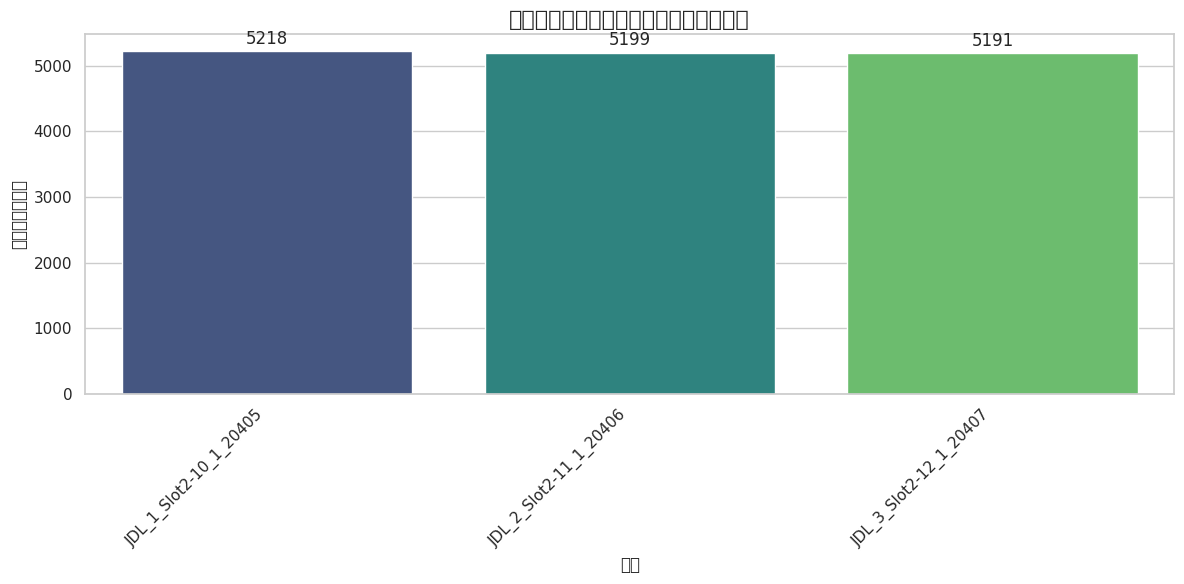

/tmp/ipykernel_1106/268215240.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=summary_stats, x='样本名称', y='peptide_count', palette='plasma')
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/tmp/ipykernel_1106/268215240.py:77: UserWarning: Glyph 2

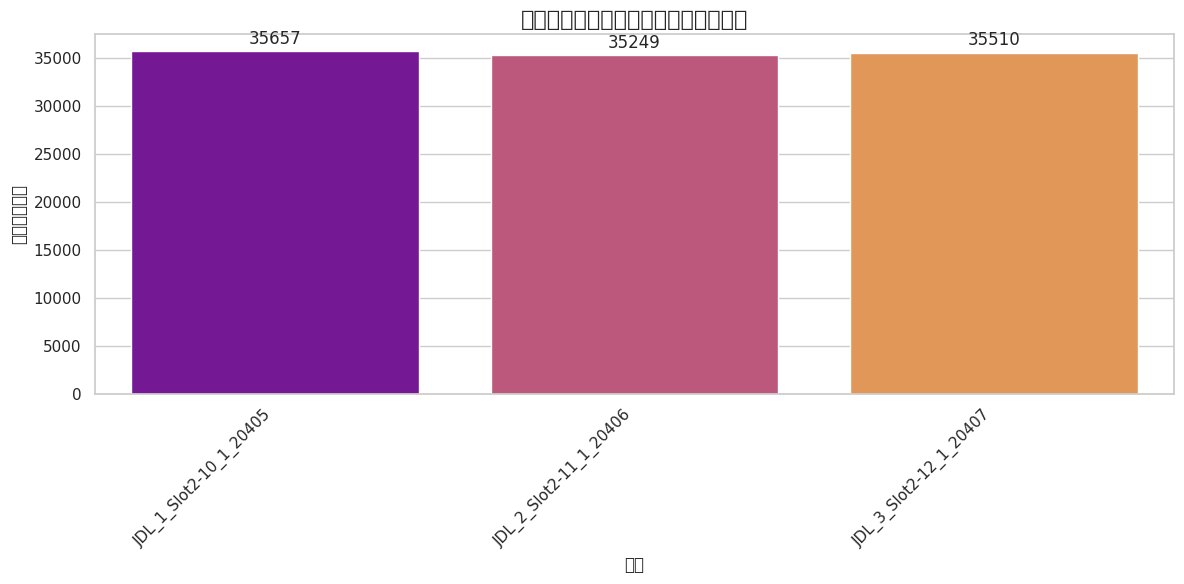

In [ ]:
# Cell 3: 调用函数进行分析

# 调用我们自己定义的函数，把准备好的数据 df_filtered 传给它
summary_table = assess_reproducibility_counts(dataframe=df_filtered, 
                                              plot_title_prefix='小鼠肝脏样本')